# Investigate Business Hotel

## panggil data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hotel_bookings_data.csv')
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Mengisi data kosong

In [4]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [5]:
#untuk cek data behavior
df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'city', 'company', 'agent']].tail(60)

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,city,company,agent
119330,2019,October,29,Kabupaten Magelang,NaN,9.0
119331,2019,October,31,Kabupaten Gresik,NaN,9.0
119332,2019,October,31,Kabupaten Bandung,NaN,9.0
119333,2019,October,28,Kabupaten Bandung,NaN,9.0
119334,2019,October,30,Kabupaten Bangka,NaN,9.0
119335,2019,October,31,Kota Surabaya,NaN,9.0
119336,2019,October,29,Kota Cimahi,NaN,9.0
119337,2019,October,30,Kabupaten Bandung,NaN,14.0
119338,2019,October,29,Kabupaten Gresik,NaN,7.0
119339,2019,October,29,Kabupaten Kepulauan Seribu,NaN,14.0


In [6]:
#untuk cek data behavior
df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'city', 'company', 'agent']].head(60)

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,city,company,agent
0,2017,September,1,Kota Denpasar,NaN,NaN
1,2017,September,1,Kota Denpasar,NaN,NaN
2,2017,September,1,Kabupaten Bangka,NaN,NaN
3,2017,September,1,Kabupaten Bangka,NaN,304.0
4,2017,September,1,Kabupaten Bangka,NaN,240.0
5,2017,September,1,Kabupaten Bangka,NaN,240.0
6,2017,September,1,Kota Denpasar,NaN,NaN
7,2017,September,1,Kota Denpasar,NaN,303.0
8,2017,September,1,Kota Denpasar,NaN,240.0
9,2017,September,1,Kota Denpasar,NaN,15.0


In [7]:
dfcheck = df[df['company'] == 0]
dfcheck.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status


**Setelah dilihat dari data behaviornya, ternyata kolom city dan agent umumnya memiliki isi yang sama seperti baris sebelum/sesudahnya. kemungkinan karena masih merupakan 1 rombongan yang sama (yang menginap). sehingga diperkirakan kolom city yang bernilai NaN akan diisi dengan metode ffill dan bfill. Ternyata kolom company tidak memiliki nilai 0 yang dapat diperkirakan bahwa pengunjung hotel tersebut bukan untuk kunjungan kerja dari perusahaan manapun sehingga akan diisi nilai 0 (nol)**

In [8]:
df['city'] = df['city'].fillna(method='ffill')
df['city'] = df['city'].fillna(method='bfill')
df['agent'] = df['agent'].fillna(method='bfill')
df['company'] = df['company'].fillna(value=0)
df['children'] = df['children'].fillna(value=0) #kolom anak yang kosong akan dianggap tidak memiliki anak
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Mengganti nilai yang tidak sesuai

In [9]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [10]:
df['meal'].replace('Undefined', 'No Meal', inplace=True) #undefined dianggap no meal
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

## Membuat kolom baru dan drop yang tidak diperlukan

In [11]:
df['tot_guest'] = df['adults'] + df['children'] + df['babies']
df['tot_guest']

0         2.0
1         2.0
2         1.0
3         1.0
4         2.0
         ... 
119385    2.0
119386    3.0
119387    2.0
119388    2.0
119389    2.0
Name: tot_guest, Length: 119390, dtype: float64

In [12]:
df.drop(['children', 'adults', 'babies'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   meal                            119390 non-null  object 
 10  city                            119390 non-null  object 
 11  market_segment                  119390 non-null  object 
 12  distribution_cha

## Grouping

In [13]:
df.groupby(['hotel', 'arrival_date_month'])['hotel'].count()

hotel         arrival_date_month
City Hotel    April                 4965
              August                7894
              December              7605
              February              4132
              January               4357
              July                  8232
              June                  7480
              March                 3736
              May                   6458
              November              7400
              October               8983
              September             8088
Resort Hotel  April                 3103
              August                3045
              December              3555
              February              2648
              January               2437
              July                  3559
              June                  3609
              March                 2193
              May                   3336
              November              3108
              October               4894
              September 

**setelah diperhatikan, data bulan tidak urut. Maka perlu dilakukan normalisasi**

## Normalisasi data bulan

In [14]:
# buat dictionary dulu
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Normalisasi kolom bulan dg membuat kolom baru
df['month'] = df['arrival_date_month'].map(month_to_number)
df.drop('arrival_date_month', axis = 1, inplace=True)

df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'meal', 'city',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'tot_guest', 'month'],
      dtype='object')

## Membuat visualisasi

### Membuat ID untuk df dulu

In [15]:
df['ID'] = df.reset_index().index

### Group by kembali

In [16]:
df2 = df.groupby(['month', 'hotel'])['ID'].count().unstack()
df2

hotel,City Hotel,Resort Hotel
month,,
1,4357,2437
2,4132,2648
3,3736,2193
4,4965,3103
5,6458,3336
6,7480,3609
7,8232,3559
8,7894,3045
9,8088,4573


In [17]:
df3 = df.groupby(['month'])['ID'].count().reset_index()
df3

,month,ID
0,1,6794
1,2,6780
2,3,5929
3,4,8068
4,5,9794
5,6,11089
6,7,11791
7,8,10939
8,9,12661
9,10,13877


### Line Chart

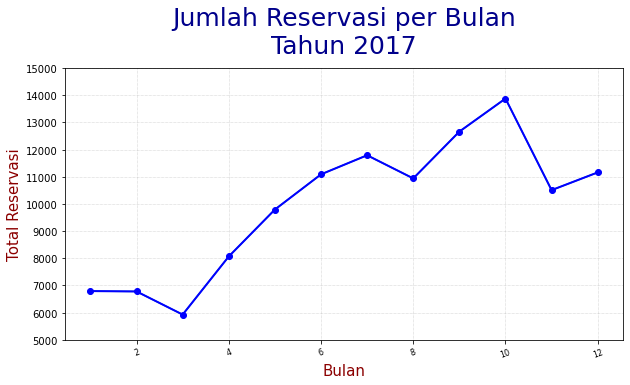

In [18]:
plt.figure(figsize=(10,5))

# membuat line plot
plt.plot(df3['month'], df3['ID'])

# garis
plot_line = plt.plot(df3['month'], df3['ID'])
plt.setp(plot_line, color='blue', linestyle='-',  linewidth=2, marker='o')

# xticks & yticks
ytick_label,location = plt.yticks()
plt.yticks(ytick_label, (ytick_label).astype(int))
plt.xticks(rotation=20,fontsize=8)
                                     
# judul & label
plt.title('Jumlah Reservasi per Bulan\nTahun 2017',color='darkblue', fontsize=25, pad = 15)
plt.xlabel('Bulan',fontsize=15,color='darkred')
plt.ylabel('Total Reservasi',fontsize=15,color='darkred')

# mulai y axis
#plt.ylim(ymin=0)#mulai dari 0
plt.ylim(ymin=5000)#mulai dari 2 (karena miliar)

# grid
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

# save gambar
plt.savefig('kustomer per bulan 2017.png')

plt.show()

<Figure size 720x720 with 0 Axes>

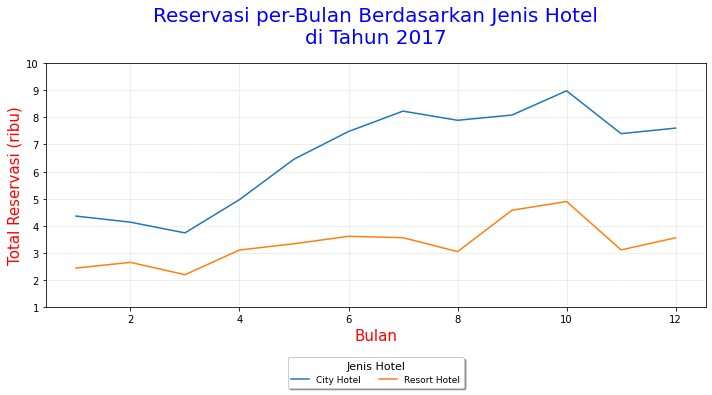

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(10,10))
#membuat kerangka grafik
df2.plot()
plt.title('Reservasi per-Bulan Berdasarkan Jenis Hotel\ndi Tahun 2017', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Bulan', fontsize = 15, color='red')
plt.ylabel('Total Reservasi (ribu)', fontsize=15, color='red')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=1000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))
plt.legend(title='Jenis Hotel', loc='lower center', bbox_to_anchor=(0.5, -0.35), shadow=True, ncol=5, fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 6)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()

plt.savefig('Reservasiperjenish.png')

**Berdasarkan Visualisasi diatas, menunjukkan bahwa jumlah reservasi terendah terjadi pada Bulan Maret dan jumlah reservasi tertinggi terjadi pada bulan Oktober. Penurunan Jumlah reservasi yang cukup signifikan juga terjadi pada bulan November. Jumlah reservasi pada jenis hotel resort lebih tinggi dibandingkan jenis hotel city, lonjakan pada jenis hotel city juga lebih signifikan dibandingkan dengan jenis hotel resort.**

In [20]:
df['deposit_type'].unique() #cek aja

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [21]:
df['market_segment'].unique() #cek aja

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

## Tambah kolom durasi menginap

In [22]:
df['durasi_stay_nights'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
df['durasi_stay_nights'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7, 14, 15, 10, 11,  8,  9, 21, 13, 12,
       18, 46, 28, 17, 19, 22, 23, 16, 29, 42, 20, 26, 33, 30, 56, 25, 27,
       60, 69, 35, 45, 38, 24, 48, 49, 57, 34, 43], dtype=int64)

## kelompokkan durasi menginap

In [23]:
# Fungsi untuk mengelompokkan durasi menginap berdasarkan kriteria
def group_durasi_stay(duration):
    if duration == 0:
        return 'Tidak Menginap'
    elif 1 <= duration <= 2:
        return 'Menginap <Seminggu'
    elif 3 <= duration <= 7:
        return 'Menginap Seminggu'
    elif 8 <= duration <= 14:
        return 'Menginap 2 Minggu'
    elif 15 <= duration <= 21:
        return 'Menginap 3 Minggu'
    elif 22 <= duration <= 29:
        return 'Menginap Sebulan'
    else:
        return 'Menginap >Sebulan'

# Menerapkan fungsi group_durasi_stay ke kolom "durasi_stay_nights" dan menyimpan hasilnya dalam kolom baru "durasi_stay"
df['durasi_stay'] = df['durasi_stay_nights'].apply(group_durasi_stay)
df['durasi_stay']

0             Tidak Menginap
1             Tidak Menginap
2         Menginap <Seminggu
3         Menginap <Seminggu
4         Menginap <Seminggu
                 ...        
119385     Menginap Seminggu
119386     Menginap Seminggu
119387     Menginap Seminggu
119388     Menginap Seminggu
119389     Menginap 2 Minggu
Name: durasi_stay, Length: 119390, dtype: object

## agregasi data status reservasi

In [24]:
df.groupby(['durasi_stay', 'reservation_status'])['ID'].count()

durasi_stay         reservation_status
Menginap 2 Minggu   Canceled               1551
                    Check-Out              3182
                    No-Show                  85
Menginap 3 Minggu   Canceled                137
                    Check-Out               121
                    No-Show                  19
Menginap <Seminggu  Canceled              16884
                    Check-Out             31229
                    No-Show                 550
Menginap >Sebulan   Canceled                 16
                    Check-Out                21
Menginap Sebulan    Canceled                 62
                    Check-Out                54
                    No-Show                   9
Menginap Seminggu   Canceled              24345
                    Check-Out             39879
                    No-Show                 531
Tidak Menginap      Canceled                 22
                    Check-Out               680
                    No-Show                  13
N

## Visualisasi rasio pembatalan reservasi

In [25]:
# Fungsi untuk mengelompokkan data berdasarkan "durasi_stay" dan "reservation_status" dan menghitung jumlah ID
def count_reservations_by_status(group):
    return group.groupby('durasi_stay')['ID'].count()

# Mengelompokkan data berdasarkan "durasi_stay" dan "reservation_status" serta menghitung jumlah ID
df4 = df.groupby('reservation_status').apply(count_reservations_by_status).unstack().fillna(0)
df4

durasi_stay,Menginap 2 Minggu,Menginap 3 Minggu,Menginap <Seminggu,Menginap >Sebulan,Menginap Sebulan,Menginap Seminggu,Tidak Menginap
reservation_status,,,,,,,
Canceled,1551.0,137.0,16884.0,16.0,62.0,24345.0,22.0
Check-Out,3182.0,121.0,31229.0,21.0,54.0,39879.0,680.0
No-Show,85.0,19.0,550.0,0.0,9.0,531.0,13.0


### Pie Chart

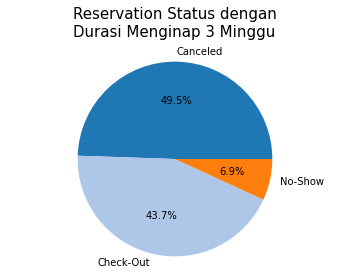

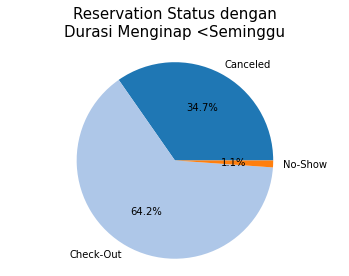

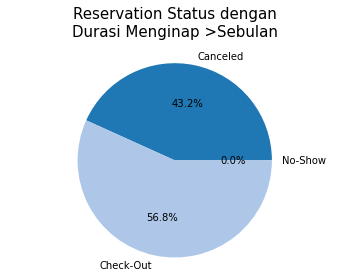

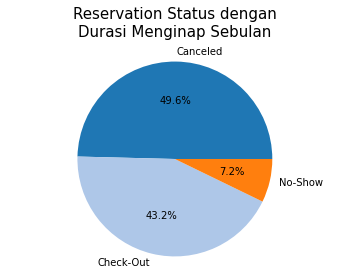

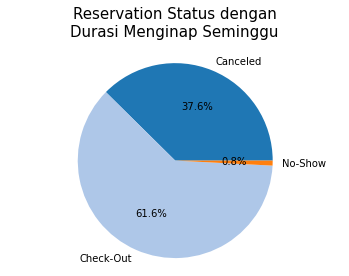

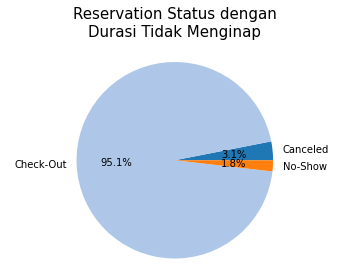

In [26]:
colors = plt.cm.tab20.colors

# Membuat diagram pie chart untuk setiap jenis kolom "durasi_stay"
for col in df4.columns[1:]:
    plt.figure()
    plt.pie(df4[col], labels=df4[col].index, autopct='%1.1f%%',  colors=colors)
    plt.title(f'Reservation Status dengan\nDurasi {col}', fontsize = 15, pad = 15)
    plt.axis('equal')
    plt.show()

### Bar Chart

In [27]:
df4 = df4.reset_index()
df4

durasi_stay,reservation_status,Menginap 2 Minggu,Menginap 3 Minggu,Menginap <Seminggu,Menginap >Sebulan,Menginap Sebulan,Menginap Seminggu,Tidak Menginap
0,Canceled,1551.0,137.0,16884.0,16.0,62.0,24345.0,22.0
1,Check-Out,3182.0,121.0,31229.0,21.0,54.0,39879.0,680.0
2,No-Show,85.0,19.0,550.0,0.0,9.0,531.0,13.0


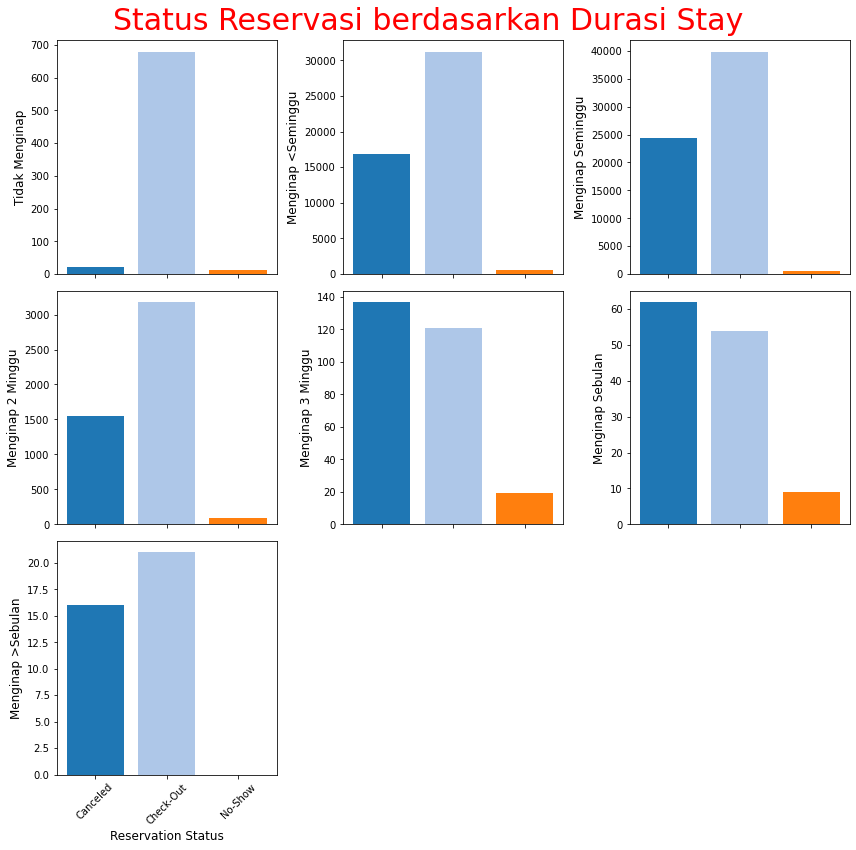

In [28]:
# Set up the plot
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True)
colors = plt.cm.tab20.colors

# Remove unused subplots
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

# Bar chart for Canceled reservations
axes[0,0].bar(df4['reservation_status'], df4['Tidak Menginap'], color=colors)
axes[0,0].set_ylabel('Tidak Menginap', fontsize=12)
axes[0,0].tick_params(axis='x', rotation=45, labelsize=10)

# Bar chart for Check-Out reservations
axes[0,1].bar(df4['reservation_status'], df4['Menginap <Seminggu'], color=colors)
axes[0,1].set_ylabel('Menginap <Seminggu', fontsize=12)
axes[0,1].tick_params(axis='x', rotation=45, labelsize=10)

# Bar chart for No-Show reservations
axes[0,2].bar(df4['reservation_status'], df4['Menginap Seminggu'], color=colors)
axes[0,2].set_ylabel('Menginap Seminggu', fontsize=12)
axes[0,2].tick_params(axis='x', rotation=45, labelsize=10)

# Bar chart for Canceled reservations
axes[1,0].bar(df4['reservation_status'], df4['Menginap 2 Minggu'], color=colors)
axes[1,0].set_ylabel('Menginap 2 Minggu', fontsize=12)
axes[1,0].tick_params(axis='x', rotation=45, labelsize=10)

# Bar chart for Check-Out reservations
axes[1,1].bar(df4['reservation_status'], df4['Menginap 3 Minggu'], color=colors)
axes[1,1].set_ylabel('Menginap 3 Minggu', fontsize=12)
axes[1,1].tick_params(axis='x', rotation=45, labelsize=10)

# Bar chart for No-Show reservations
axes[1,2].bar(df4['reservation_status'], df4['Menginap Sebulan'], color=colors)
axes[1,2].set_ylabel('Menginap Sebulan', fontsize=12)
axes[1,2].tick_params(axis='x', rotation=45, labelsize=10)

# Bar chart for No-Show reservations
axes[2,0].bar(df4['reservation_status'], df4['Menginap >Sebulan'], color=colors)
axes[2,0].set_ylabel('Menginap >Sebulan', fontsize=12)
axes[2,0].tick_params(axis='x', rotation=45, labelsize=10)

# Set title and x-axis label
fig.suptitle('Status Reservasi berdasarkan Durasi Stay', fontsize=30, color = 'red')
plt.xlabel('Reservation Status', fontsize=12)

#plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

## Kategori waiting list

In [29]:
print(df['days_in_waiting_list'].max())

391


In [30]:
# Fungsi untuk mengelompokkan durasi menginap berdasarkan kriteria
def waiting_list_group(waiting):
    if waiting == 0:
        return 'Not Wait'
    elif 1 <= waiting <= 50:
        return 'Waiting 1 - 50 days'
    elif 51 <= waiting <= 100:
        return 'Waiting 51 - 100 days'
    elif 101 <= waiting <= 150:
        return 'Waiting 101 - 150 days'
    elif 151 <= waiting <= 200:
        return 'Waiting 151 - 200 days'
    elif 201 <= waiting <= 250:
        return 'Waiting 201 - 250 days'
    elif 251 <= waiting <= 300:
        return 'Waiting 201 - 250 days'
    else:
        return 'Waiting >301 days'

# Menerapkan fungsi group_durasi_stay ke kolom "days_in_waiting_list" dan menyimpan hasilnya dalam kolom baru
df['waiting_days'] = df['days_in_waiting_list'].apply(waiting_list_group)
df['waiting_days']

0         Not Wait
1         Not Wait
2         Not Wait
3         Not Wait
4         Not Wait
            ...   
119385    Not Wait
119386    Not Wait
119387    Not Wait
119388    Not Wait
119389    Not Wait
Name: waiting_days, Length: 119390, dtype: object

## Visualisasi rasio pembatalan reservasi 2

### Agregasi data

In [31]:
# Fungsi untuk mengelompokkan data berdasarkan "durasi_stay" dan "reservation_status" dan menghitung jumlah ID
def count_waiting(group):
    return group.groupby('waiting_days')['ID'].count()

# Mengelompokkan data berdasarkan "durasi_stay" dan "reservation_status" serta menghitung jumlah ID
df5 = df.groupby('reservation_status').apply(count_waiting).unstack()
df5

waiting_days,Not Wait,Waiting 1 - 50 days,Waiting 101 - 150 days,Waiting 151 - 200 days,Waiting 201 - 250 days,Waiting 51 - 100 days,Waiting >301 days
reservation_status,,,,,,,
Canceled,40658.0,1408.0,162.0,100.0,55.0,579.0,55.0
Check-Out,73827.0,401.0,150.0,108.0,97.0,563.0,20.0
No-Show,1207.0,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df5.fillna(0, inplace= True)
df5

waiting_days,Not Wait,Waiting 1 - 50 days,Waiting 101 - 150 days,Waiting 151 - 200 days,Waiting 201 - 250 days,Waiting 51 - 100 days,Waiting >301 days
reservation_status,,,,,,,
Canceled,40658.0,1408.0,162.0,100.0,55.0,579.0,55.0
Check-Out,73827.0,401.0,150.0,108.0,97.0,563.0,20.0
No-Show,1207.0,0.0,0.0,0.0,0.0,0.0,0.0


### Visualisasi Pie Chart

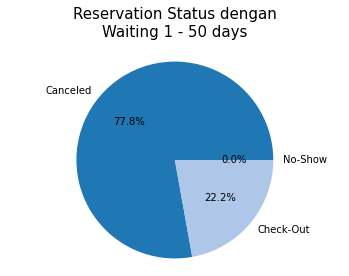

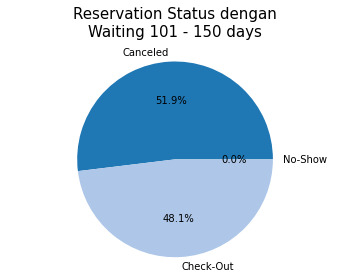

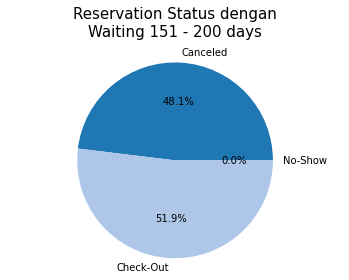

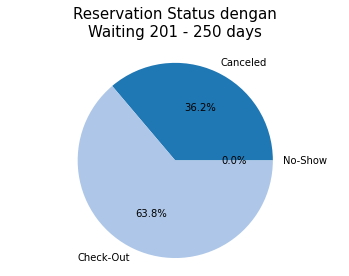

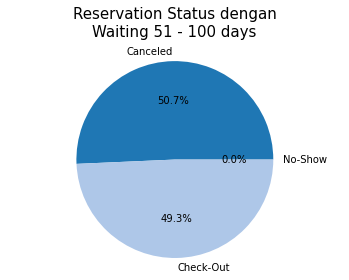

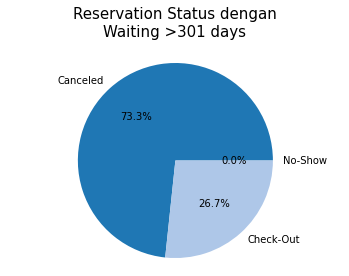

In [33]:
colors = plt.cm.tab20.colors

# Membuat diagram pie chart untuk setiap jenis kolom "durasi_stay"
for col in df5.columns[1:]:
    plt.figure()
    plt.pie(df5[col], labels=df5[col].index, autopct='%1.1f%%',  colors=colors)
    plt.title(f'Reservation Status dengan\n{col}', fontsize = 15, pad = 15)
    plt.axis('equal')
    plt.show()

In [34]:
df5 = df5.reset_index()
df5

waiting_days,reservation_status,Not Wait,Waiting 1 - 50 days,Waiting 101 - 150 days,Waiting 151 - 200 days,Waiting 201 - 250 days,Waiting 51 - 100 days,Waiting >301 days
0,Canceled,40658.0,1408.0,162.0,100.0,55.0,579.0,55.0
1,Check-Out,73827.0,401.0,150.0,108.0,97.0,563.0,20.0
2,No-Show,1207.0,0.0,0.0,0.0,0.0,0.0,0.0


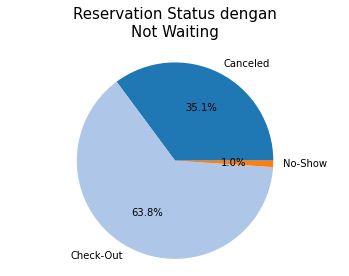

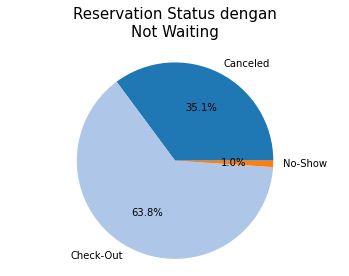

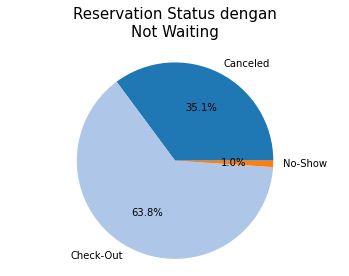

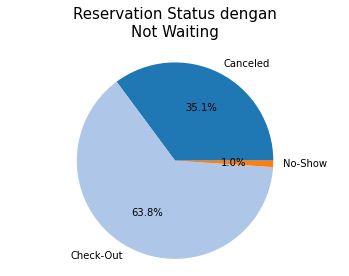

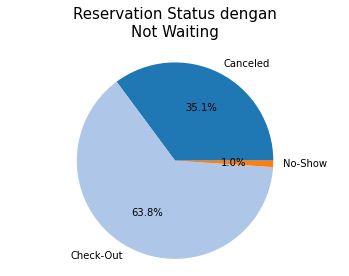

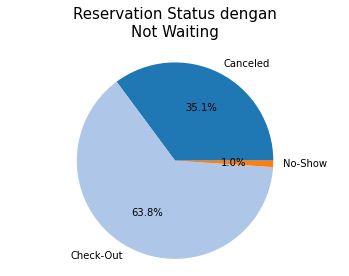

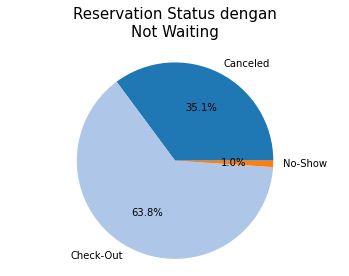

In [35]:
for col in df5.columns[1:]:
    plt.figure()
    plt.pie(df5['Not Wait'], labels=df5['reservation_status'], autopct='%1.1f%%',  colors=colors)
    plt.title(f'Reservation Status dengan\nNot Waiting', fontsize = 15, pad = 15)
    plt.axis('equal')
    plt.show()

### Agregasi Bar Chart

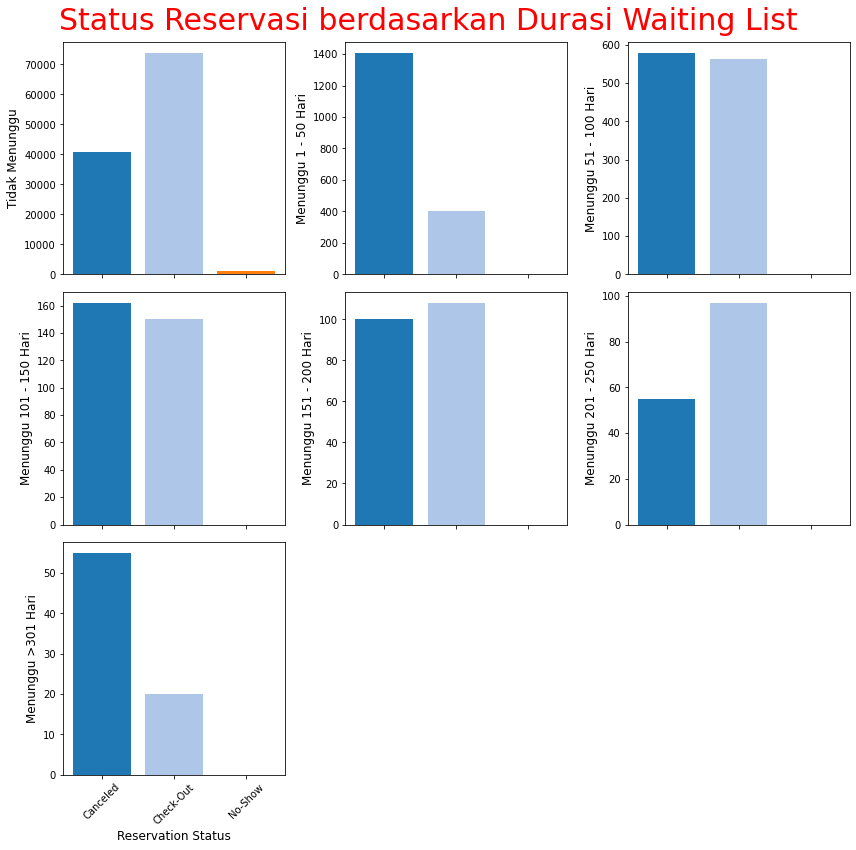

In [36]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True)
colors = plt.cm.tab20.colors

# Remove unused subplots
fig.delaxes(axes[2, 2])
fig.delaxes(axes[2, 1])

# Bar chart for Canceled reservations
axes[0,0].bar(df5['reservation_status'], df5['Not Wait'], color=colors)
axes[0,0].set_ylabel('Tidak Menunggu', fontsize=12)
axes[0,0].tick_params(axis='x', rotation=45, labelsize=10)

# Bar chart for Check-Out reservations
axes[0,1].bar(df5['reservation_status'], df5['Waiting 1 - 50 days'], color=colors)
axes[0,1].set_ylabel('Menunggu 1 - 50 Hari', fontsize=12)
axes[0,1].tick_params(axis='x', rotation=45, labelsize=10)

# Bar chart for No-Show reservations
axes[0,2].bar(df5['reservation_status'], df5['Waiting 51 - 100 days'], color=colors)
axes[0,2].set_ylabel('Menunggu 51 - 100 Hari', fontsize=12)
axes[0,2].tick_params(axis='x', rotation=45, labelsize=10)

# Bar chart for Canceled reservations
axes[1,0].bar(df5['reservation_status'], df5['Waiting 101 - 150 days'], color=colors)
axes[1,0].set_ylabel('Menunggu 101 - 150 Hari', fontsize=12)
axes[1,0].tick_params(axis='x', rotation=45, labelsize=10)

# Bar chart for Check-Out reservations
axes[1,1].bar(df5['reservation_status'], df5['Waiting 151 - 200 days'], color=colors)
axes[1,1].set_ylabel('Menunggu 151 - 200 Hari', fontsize=12)
axes[1,1].tick_params(axis='x', rotation=45, labelsize=10)

# Bar chart for No-Show reservations
axes[1,2].bar(df5['reservation_status'], df5['Waiting 201 - 250 days'], color=colors)
axes[1,2].set_ylabel('Menunggu 201 - 250 Hari', fontsize=12)
axes[1,2].tick_params(axis='x', rotation=45, labelsize=10)

# Bar chart for No-Show reservations
axes[2,0].bar(df5['reservation_status'], df5['Waiting >301 days'], color=colors)
axes[2,0].set_ylabel('Menunggu >301 Hari', fontsize=12)
axes[2,0].tick_params(axis='x', rotation=45, labelsize=10)


# Set title and x-axis label
fig.suptitle('Status Reservasi berdasarkan Durasi Waiting List', fontsize=30, color = 'red')
plt.xlabel('Reservation Status', fontsize=12)

#plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

## Insight:

**1. Jumlah reservasi terendah terjadi pada Bulan Maret dan jumlah reservasi tertinggi terjadi pada bulan Oktober. Penurunan Jumlah reservasi yang cukup signifikan juga terjadi pada bulan November. Jumlah reservasi pada jenis hotel resort lebih tinggi dibandingkan jenis hotel city, lonjakan pada jenis hotel city juga lebih signifikan dibandingkan dengan jenis hotel resort.**

**2. Umumnya jumlah status reservasi yang ‘canceled’ semakin banyak jika customer stay selama 3 minggu sampai sekitar sebulan, namun memiliki selisih yang kecil dengan status reservasi ‘check-out’.**

**3. Perbedaan cancellation dengan check-out dari waiting selama sekitar 51 – 200 hari cukup kecil. Cancellation jarang terjadi ketika waiting selama 201 – 250 hari dan tidak waiting. Cancellation yang besar terjadi ketika waiting selama >301 hari.**